In [394]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
from sklearn.model_selection import GridSearchCV
import joblib

# 맑은 고딕 폰트를 사용하도록 설정
plt.rcParams["font.family"] = 'Malgun Gothic'

# [Step 3] 머신러닝 모델링1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [395]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
df_21_X = pd.read_csv('train_x.csv')
df_21_Y = pd.read_csv('train_y.csv')
df_22_X = pd.read_csv('test_x.csv')
df_22_Y = pd.read_csv('test_y.csv')

In [396]:
df_22_X.head()

,CO,PM10,PM25,시정(10m),7day_Avg_PM10,Rain_Value_가벼운 비,Rain_Value_보통의 비,Rain_Value_비가 오지않음,Rain_Value_심한 비
0,0.4,23.0,12.0,2000,23.0,0,0,1,0
1,0.4,20.0,9.0,2000,21.5,0,0,1,0
2,0.5,20.0,9.0,2000,21.0,0,0,1,0
3,0.5,19.0,10.0,2000,20.5,0,0,1,0
4,0.5,24.0,11.0,2000,21.2,0,0,1,0


In [397]:
# 스케일링 작업
# x(features) 값의 범위를 0~ 1로 통일한다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_21_X)
df_21_X = scaler.transform(df_21_X)
df_22_X = scaler.transform(df_22_X)

df_21_X = pd.DataFrame(df_21_X, columns = ['CO', 'PM10', 'PM25', '시정(10m)', '7day_Avg_PM10', 'Rain_Value_가벼운 비', 'Rain_Value_보통의 비', 'Rain_Value_비가 오지않음', 'Rain_Value_심한 비'])
df_22_X = pd.DataFrame(df_22_X, columns = ['CO', 'PM10', 'PM25', '시정(10m)', '7day_Avg_PM10', 'Rain_Value_가벼운 비', 'Rain_Value_보통의 비', 'Rain_Value_비가 오지않음', 'Rain_Value_심한 비'])

In [398]:
df_21_X.head()

,CO,PM10,PM25,시정(10m),7day_Avg_PM10,Rain_Value_가벼운 비,Rain_Value_보통의 비,Rain_Value_비가 오지않음,Rain_Value_심한 비
0,0.166667,0.022364,0.084967,1.0,0.025249,0.0,0.0,1.0,0.0
1,0.222222,0.023429,0.084967,1.0,0.025850,0.0,0.0,1.0,0.0
2,0.222222,0.025559,0.098039,1.0,0.026852,0.0,0.0,1.0,0.0
3,0.222222,0.021299,0.078431,1.0,0.026151,0.0,0.0,1.0,0.0
4,0.222222,0.022364,0.084967,1.0,0.025970,0.0,0.0,1.0,0.0


---

#### **<span style="color:blue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [399]:
# LinearRegression 코드를 작성하세요.
LR = LinearRegression()

LR.fit(df_21_X, df_21_Y)

LinearRegression()

In [400]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
y_pred = LR.predict(df_22_X)

In [401]:
# 예측값과 실제값 비교
predict = list(y_pred.flatten()[0:10:1])
real = list(df_22_Y['PM10_1'][0:10:1])
print('예측값 10개 : ', predict)
print('실제값 10개 : ', real)

예측값 10개 :  [23.3049260888712, 20.405370049025993, 20.849706522019446, 19.72003038367461, 25.154100746888354, 19.95539829104444, 25.264164175828164, 28.387247619745608, 27.45800167949904, 22.711454807403975]
실제값 10개 :  [20.0, 20.0, 19.0, 24.0, 19.0, 24.0, 27.0, 26.0, 22.0, 22.0]


In [402]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print('mse : ', mse(df_22_Y, y_pred))
print('mae : ', mae(df_22_Y, y_pred))
print('r2 : ', r2_score(df_22_Y, y_pred))

mse :  36.615024251185154
mae :  3.9034997737955197
r2 :  0.9337486810879552


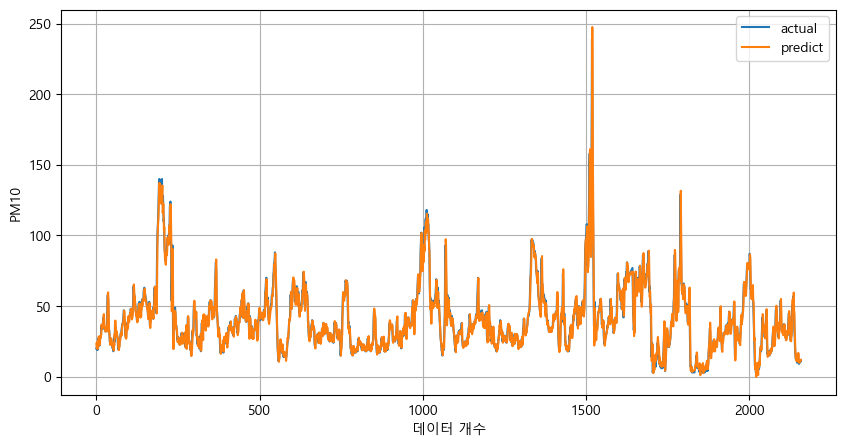

In [403]:
# 예측값과 실제값 시각화
plt.figure(figsize=(10, 5))
plt.plot(df_22_Y, label='actual')
plt.plot(y_pred, label='predict')
plt.xlabel('데이터 개수')
plt.ylabel('PM10') 
plt.legend()
plt.grid()
plt.show()

# [Step 4] 머신러닝 모델링2

#### **<span style="color:blue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [404]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.



In [405]:
# Test 데이터로 성능을 평가해보세요.




In [406]:
# 학습한 모델을 파일로 저장해보세요.



In [407]:
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인



In [408]:
# (선택) 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [409]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.



In [410]:
# Test 데이터로 성능을 평가해보세요.




In [411]:
# 학습한 모델을 파일로 저장해보세요.




In [412]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인




In [413]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [414]:
# KNN
KNN = KNeighborsRegressor(n_neighbors=10)

KNN.fit(df_21_X, df_21_Y)

y_pred = KNN.predict(df_22_X)

In [415]:
# 예측값과 실제값 비교
predict = list(y_pred.flatten()[0:10:1])
real = list(df_22_Y['PM10_1'][0:10:1])
print('예측값 10개 : ', predict)
print('실제값 10개 : ', real)

예측값 10개 :  [23.5, 19.7, 19.7, 20.5, 21.5, 20.65, 27.3, 26.0, 25.05, 21.4]
실제값 10개 :  [20.0, 20.0, 19.0, 24.0, 19.0, 24.0, 27.0, 26.0, 22.0, 22.0]


In [416]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print('mse : ', mse(df_22_Y, y_pred))
print('rmse : ', mse(df_22_Y, y_pred) ** 0.5)
print('mae : ', mae(df_22_Y, y_pred))
print('r2 : ', r2_score(df_22_Y, y_pred))

mse :  81.33150105963531
rmse :  9.018397920896778
mae :  5.981443622792587
r2 :  0.8528385731132541


In [417]:
# Decision Tree
DT = DTR(max_depth=8)

DT.fit(df_21_X, df_21_Y)

y_pred = DT.predict(df_22_X)

In [418]:
# 예측값과 실제값 비교
predict = list(y_pred.flatten()[0:10:1])
real = list(df_22_Y['PM10_1'][0:10:1])
print('예측값 10개 : ', predict)
print('실제값 10개 : ', real)

예측값 10개 :  [22.77777777777778, 20.695575221238936, 20.695575221238936, 18.92156862745098, 24.41062801932367, 18.92156862745098, 24.41062801932367, 27.687637969094926, 25.883582089552238, 21.741622574955905]
실제값 10개 :  [20.0, 20.0, 19.0, 24.0, 19.0, 24.0, 27.0, 26.0, 22.0, 22.0]


In [419]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print('mse : ', mse(df_22_Y, y_pred))
print('rmse : ', mse(df_22_Y, y_pred) ** 0.5)
print('mae : ', mae(df_22_Y, y_pred))
print('r2 : ', r2_score(df_22_Y, y_pred))

mse :  56.40727122052505
rmse :  7.510477429599602
mae :  4.2140793582068055
r2 :  0.897936538592672


In [420]:
# RandomForest

In [421]:
RF = RFR(n_estimators=50, max_depth=None)

RF.fit(df_21_X, df_21_Y)

y_pred = RF.predict(df_22_X)

C:\Users\user\AppData\Local\Temp\ipykernel_14848\2519420311.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(df_21_X, df_21_Y)


In [422]:
# 예측값과 실제값 비교
predict = list(y_pred.flatten()[0:10:1])
real = list(df_22_Y['PM10_1'][0:10:1])
print('예측값 10개 : ', predict)
print('실제값 10개 : ', real)

예측값 10개 :  [23.78, 20.54, 21.28, 18.94, 26.38, 17.6, 26.56, 28.14, 27.72, 25.04]
실제값 10개 :  [20.0, 20.0, 19.0, 24.0, 19.0, 24.0, 27.0, 26.0, 22.0, 22.0]


In [423]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print('mse : ', mse(df_22_Y, y_pred))
print('rmse : ', mse(df_22_Y, y_pred) ** 0.5)
print('mae : ', mae(df_22_Y, y_pred))
print('r2 : ', r2_score(df_22_Y, y_pred))

mse :  40.447196380687465
rmse :  6.359811033410306
mae :  4.199424076047289
r2 :  0.9268147389953375


In [424]:
# Gradient Boosting
GB = GBR(learning_rate=0.1, n_estimators=101, max_depth=3)

GB.fit(df_21_X, df_21_Y)

y_pred = GB.predict(df_22_X)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [425]:
# 예측값과 실제값 비교
predict = list(y_pred.flatten()[0:10:1])
real = list(df_22_Y['PM10_1'][0:10:1])
print('예측값 10개 : ', predict)
print('실제값 10개 : ', real)

예측값 10개 :  [23.019422482603233, 20.356005077035686, 20.818022892735, 19.746998455610584, 25.250290405576422, 20.024212326069797, 25.527504276035636, 27.423013524010646, 26.435989450649075, 22.247600824617656]
실제값 10개 :  [20.0, 20.0, 19.0, 24.0, 19.0, 24.0, 27.0, 26.0, 22.0, 22.0]


In [426]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print('mse : ', mse(df_22_Y, y_pred))
print('rmse : ', mse(df_22_Y, y_pred) ** 0.5)
print('mae : ', mae(df_22_Y, y_pred))
print('r2 : ', r2_score(df_22_Y, y_pred))

mse :  33.616353645110195
rmse :  5.79796116278043
mae :  3.800400570192615
r2 :  0.9391744833835474


In [427]:
# XGBoost
import xgboost

XGB = xgboost.XGBRegressor()

XGB.fit(df_21_X, df_21_Y)

y_pred = XGB.predict(df_22_X)

In [428]:
# 예측값과 실제값 비교
predict = list(y_pred.flatten()[0:10:1])
real = list(df_22_Y['PM10_1'][0:10:1])
print('예측값 10개 : ', predict)
print('실제값 10개 : ', real)

예측값 10개 :  [23.334785, 20.48951, 21.003105, 19.630617, 24.943495, 19.635365, 25.431904, 28.337498, 27.028109, 22.466545]
실제값 10개 :  [20.0, 20.0, 19.0, 24.0, 19.0, 24.0, 27.0, 26.0, 22.0, 22.0]


In [429]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print('mse : ', mse(df_22_Y, y_pred))
print('rmse : ', mse(df_22_Y, y_pred) ** 0.5)
print('mae : ', mae(df_22_Y, y_pred))
print('r2 : ', r2_score(df_22_Y, y_pred))

mse :  35.75506793943041
rmse :  5.979554158917738
mae :  3.9863039125018753
r2 :  0.9353046882469193


In [430]:
# LightGBM
import lightgbm 
lgbm = lightgbm.LGBMRegressor()

lgbm.fit(df_21_X, df_21_Y)

y_pred = lgbm.predict(df_22_X)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 8759, number of used features: 8
[LightGBM] [Info] Start training from score 38.786049


In [431]:
# 예측값과 실제값 비교
predict = list(y_pred.flatten()[0:10:1])
real = list(df_22_Y['PM10_1'][0:10:1])
print('예측값 10개 : ', predict)
print('실제값 10개 : ', real)

예측값 10개 :  [23.13211023131903, 20.603573926791512, 21.054374213170444, 19.48381886950244, 25.0710642652207, 19.60744579024335, 25.19469118596161, 28.120141741366695, 26.548438053429837, 22.52585730302512]
실제값 10개 :  [20.0, 20.0, 19.0, 24.0, 19.0, 24.0, 27.0, 26.0, 22.0, 22.0]


In [432]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print('mse : ', mse(df_22_Y, y_pred))
print('rmse : ', mse(df_22_Y, y_pred) ** 0.5)
print('mae : ', mae(df_22_Y, y_pred))
print('r2 : ', r2_score(df_22_Y, y_pred))

mse :  34.31363770680151
rmse :  5.857784368411107
mae :  3.8534995255957245
r2 :  0.9379128158116107


In [433]:
# Feature의 중요도 확인
df = pd.DataFrame({
    'columns' : df_21_X.columns,
    'feature_importance' : DT.feature_importances_
})

In [434]:
df.sort_values(by='feature_importance', ascending=False, inplace=True)

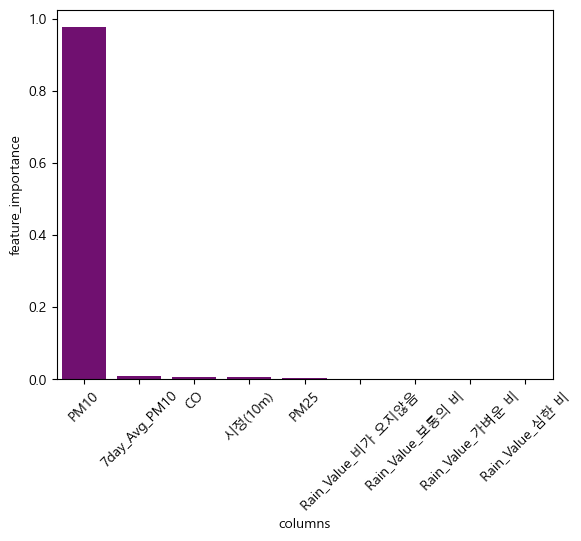

In [435]:
sns.barplot(x=df['columns'], y=df['feature_importance'], color='purple')
plt.xticks(rotation=45)
plt.show()

In [436]:
# 모델 별 시각화
model = ['LinearRegression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Random Forest', 'LightGBM']
r2_score = [0.934, 0.853, 0.938, 0.928, 0.939, 0.935, 0.938]

In [437]:
df = pd.DataFrame({
    'model' : model,
    'r2_score' : r2_score,
})

In [438]:
df.sort_values(by='r2_score', ascending=False, inplace=True)

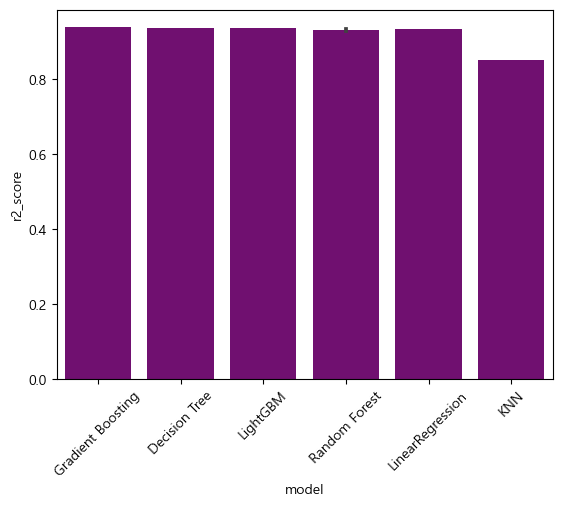

In [439]:
sns.barplot(x=df['model'], y=df['r2_score'], color='purple')
plt.xticks(rotation=45)
plt.show()

#### **<span style="color:blue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.
* Decision Tree에 대해서 파라미터 최적화를 해본다.

In [441]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model = DTR()
model = GridSearchCV(model, {'max_depth' : range(1, 100, 1)}, scoring='r2', cv=10, verbose=1,)

In [442]:
model.fit(df_21_X, df_21_Y)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 100)}, scoring='r2', verbose=1)

In [443]:
y_pred = model.predict(df_22_X)

In [444]:
# 예측값과 실제값 비교
predict = list(y_pred.flatten()[0:10:1])
real = list(df_22_Y['PM10_1'][0:10:1])
print('예측값 10개 : ', predict)
print('실제값 10개 : ', real)

예측값 10개 :  [23.90142021720969, 21.156593977154728, 21.156593977154728, 18.374287974683543, 23.90142021720969, 18.374287974683543, 23.90142021720969, 26.332669322709158, 26.332669322709158, 21.156593977154728]
실제값 10개 :  [20.0, 20.0, 19.0, 24.0, 19.0, 24.0, 27.0, 26.0, 22.0, 22.0]


In [445]:
# 최적의 파라미터와 성능 값
print('최적의 파라미터 값 : ', model.best_params_)
print('최적의 모델 성능 : ', model.best_score_) # GridSearch할 떄 scoring='r2'로 줘서 model.best_score_도 r2 score이다.

최적의 파라미터 값 :  {'max_depth': 6}
최적의 모델 성능 :  0.8561050375070215


In [446]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print('mse : ', mse(df_22_Y, y_pred))
print('rmse : ', mse(df_22_Y, y_pred) ** 0.5)
print('mae : ', mae(df_22_Y, y_pred))
print('r2 : ', model.best_score_)

mse :  47.48323598028081
rmse :  6.890808078903432
mae :  4.101369692373876
r2 :  0.8561050375070215


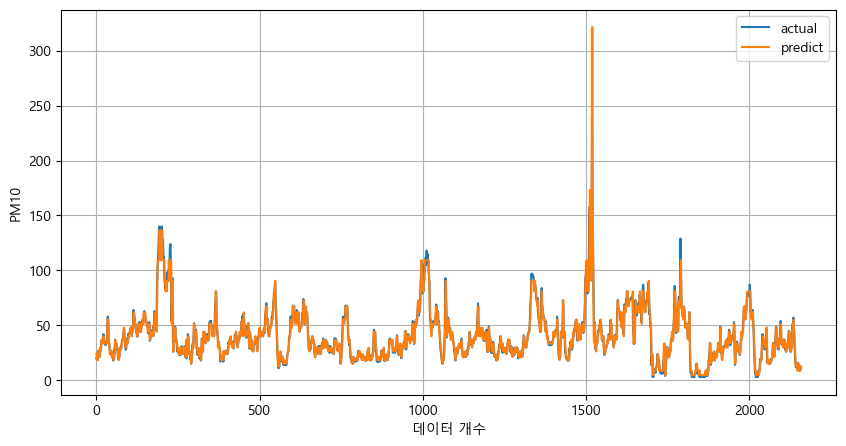

In [447]:
# 예측값과 실제값 시각화
plt.figure(figsize=(10, 5))
plt.plot(df_22_Y, label='actual')
plt.plot(y_pred, label='predict')
plt.xlabel('데이터 개수')
plt.ylabel('PM10') 
plt.legend()
plt.grid()
plt.show()

* GridSearch로 최적의 파라미터 값을 찾아 모델의 성능을 확인하고자 했는데 오히려 더 안좋아졌다.